In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/dataset.csv', sep=';')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882860 entries, 0 to 882859
Data columns (total 16 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   UserId                            882860 non-null  int64  
 1   Type                              882860 non-null  object 
 2   Name                              882860 non-null  object 
 3   StartTimeUtc                      882860 non-null  object 
 4   DurationInSeconds                 882860 non-null  int64  
 5   DistanceInMeters                  777256 non-null  object 
 6   Steps                             579034 non-null  float64
 7   AverageSpeedInMetersPerSecond     776773 non-null  object 
 8   AveragePaceInMinutesPerKilometer  766668 non-null  object 
 9   TotalElevationGainInMeters        649359 non-null  object 
 10  TotalElevationLossInMeters        648437 non-null  object 
 11  AverageHeartRateInBeatsPerMinute  813303 non-null  f

In [ ]:
print("\nEstadísticas descriptivas:")
print(df.describe())


Estadísticas descriptivas:
             UserId  DurationInSeconds          Steps  \
count  8.828600e+05       8.828600e+05  579034.000000   
mean   4.720222e+07       4.177964e+03    5109.346705   
std    2.746887e+07       8.201653e+03    5794.968945   
min    2.024000e+03      -1.764163e+06       0.000000   
25%    2.433455e+07       1.628000e+03     348.000000   
50%    4.441466e+07       3.016000e+03    3550.000000   
75%    7.270815e+07       5.013000e+03    8092.000000   
max    9.812554e+07       4.264296e+06  220378.000000   

       AverageHeartRateInBeatsPerMinute  
count                     813303.000000  
mean                         125.033942  
std                           30.888986  
min                            0.000000  
25%                          109.000000  
50%                          130.000000  
75%                          146.000000  
max                          243.000000  


Estadisticas:

In [ ]:
columna = 'TotalElevationGainInMeters'
print(df[columna].describe())

# Conteo de valores unicos
conteo_valores = df[columna].value_counts()
print("Frecuencia de cada categoría:\n", conteo_valores)

# Moda (valor más frecuente)
moda = df[columna].mode()[0]
print("\nModa:", moda)

# Número de categorías únicas
num_categorias = df[columna].nunique()
print("\nNúmero de categorías únicas:", num_categorias)

valores_nulos = df[columna].isnull().sum()
print("\nValores nulos en la columna:", valores_nulos)

count     649359
unique    185033
top            0
freq       33868
Name: TotalElevationGainInMeters, dtype: object
Frecuencia de cada categoría:
 TotalElevationGainInMeters
0            33868
2             8362
1             7131
4             6513
5             5394
             ...  
85,0625          1
25,408386        1
192,78696        1
6,5543213        1
87,01277         1
Name: count, Length: 185033, dtype: int64

Moda: 0

Número de categorías únicas: 185033

Valores nulos en la columna: 233501


<ipython-input-6-ef6420b8a37b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[columna], order=df[columna].value_counts().index, palette="viridis")


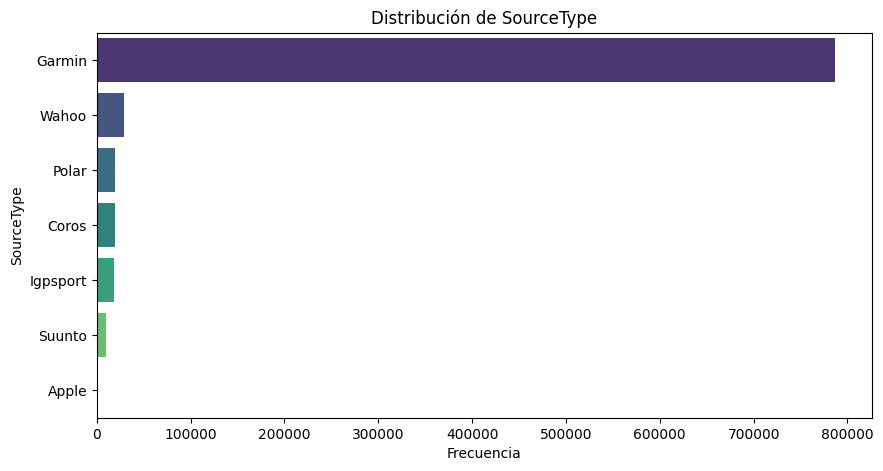

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df[columna], order=df[columna].value_counts().index, palette="viridis")
plt.xlabel("Frecuencia")
plt.ylabel(columna)
plt.title(f"Distribución de {columna}")
plt.show()

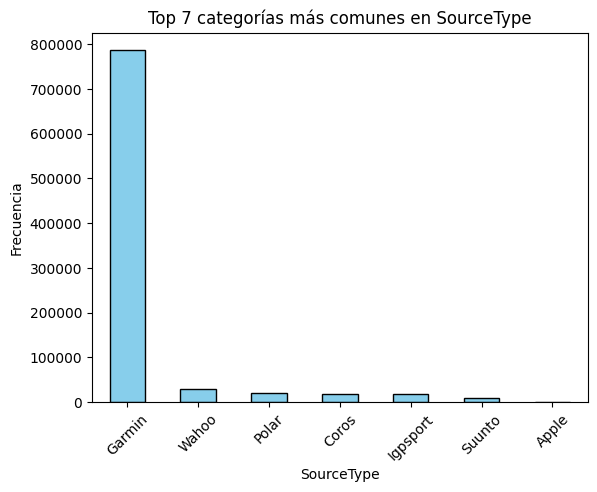

In [ ]:
df[columna].value_counts().head(7).plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel(columna)
plt.ylabel("Frecuencia")
plt.title(f"Top 7 categorías más comunes en {columna}")
plt.xticks(rotation=45)
plt.show()

In [ ]:
porcentaje_categoria = (conteo_valores / conteo_valores.sum()) * 100
print("\nPorcentaje de cada categoría:\n", porcentaje_categoria)



Porcentaje de cada categoría:
 Type
Running             39.779240
Cycling             31.368620
Other               15.136375
Walking              6.804816
Swimming             3.361235
TreadmillRunning     2.909068
IndoorCycling        0.640645
Name: count, dtype: float64


In [ ]:
df["SourceType_Agrupado"] = df["SourceType"].apply(lambda x: x if x in ["Garmin", "Wahoo", "Polar"] else "Otras")
print(df["SourceType_Agrupado"].value_counts(normalize=True) * 100)


SourceType_Agrupado
Garmin    89.092608
Otras      5.334255
Wahoo      3.340620
Polar      2.232517
Name: proportion, dtype: float64


Filtrar

In [ ]:
df_running = df[df["Type"] == "Running"]

In [ ]:
print(df_running.isnull().sum() / len(df) * 100)


UserId                               0.000000
Type                                 0.000000
Name                                 0.000000
StartTimeUtc                         0.000000
DurationInSeconds                    0.000000
DistanceInMeters                     0.110890
Steps                                0.453979
AverageSpeedInMetersPerSecond        0.112589
AveragePaceInMinutesPerKilometer     0.119158
TotalElevationGainInMeters           3.773645
TotalElevationLossInMeters           3.729357
AverageHeartRateInBeatsPerMinute     1.496727
SourceType                           0.000000
SourceName                           0.113155
Warnings                            35.829803
CreationTime                         0.000000
SourceType_Agrupado                  0.000000
dtype: float64


In [ ]:
columna = 'SourceType'
print(df_running[columna].describe())

# Conteo de valores unicos
conteo_valores = df_running[columna].value_counts()
print("Frecuencia de cada categoría:\n", conteo_valores)

# Moda (valor más frecuente)
moda = df_running[columna].mode()[0]
print("\nModa:", moda)

# Número de categorías únicas
num_categorias = df_running[columna].nunique()
print("\nNúmero de categorías únicas:", num_categorias)

valores_nulos = df_running[columna].isnull().sum()
print("\nValores nulos en la columna:", valores_nulos)

print(df_running[columna].isnull().sum() * 100)

count     351195
unique         6
top       Garmin
freq      321978
Name: SourceType, dtype: object
Frecuencia de cada categoría:
 SourceType
Garmin    321978
Coros      11248
Polar       9628
Wahoo       4287
Suunto      3965
Apple         89
Name: count, dtype: int64

Moda: Garmin

Número de categorías únicas: 6

Valores nulos en la columna: 0
0


In [ ]:
columna = "TotalElevationGainInMeters"  # Reemplaza con el nombre real de tu columna
print(df_running[columna].describe())


count     317879
unique    130919
top            0
freq       10296
Name: TotalElevationGainInMeters, dtype: object
